# Effect of instantaneous weather sampling rate on subhourly clipping errors - SURFRAD
These notebooks resample the SURFRAD network data at different frequencies to simulate satellite data.

In [1]:
import calendar
import pathlib
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import pvlib
import rdtools
import seaborn as sns

sns.set(font_scale=1.5, rc={'figure.figsize': (16, 10)})
mpl.rcParams['figure.figsize'] = (16, 10)

DAYMINUTES = 24*60
KELVINS = 273.15
MAX_GHI_RATIO = 1.5

## Some useful functions
* `read_surfrad_year` just reads all daily files from a yearly surfrad folder
* `estimate_air_temp` is for years that have incomplete air temperature data like 1995.

In [2]:
def read_surfrad_year(surfrad_year_path):
    data = [pvlib.iotools.read_surfrad(f) for f in surfrad_year_path.iterdir()]
    dfs, heads = zip(*data)
    df = pd.concat(dfs)
    header = heads[0]
    return df, header

In [4]:
# get glob of weather files
surfrad_dir = pathlib.Path('../../SURFRAD')
print(f'Is there really a \33[1m\33[91m"SURFRAD"\33[0m\33[0m directory?'
      f' \33[1m\33[92m{surfrad_dir.exists()} \u2713\33[0m\33[0m')

Is there really a "SURFRAD" directory? True ✓


In [5]:
# get glob of Bondville, IL, yearly files
weather_dir = "Bondville_IL"
weather_path = surfrad_dir / weather_dir
print(f'Is there really a \33[1m\33[91m"{weather_path}"\33[0m\33[0m directory?'
      f' \33[1m\33[92m{weather_path.exists()} \u2713\33[0m\33[0m')

Is there really a "..\..\SURFRAD\Bondville_IL" directory? True ✓


In [6]:
# get a glob of years
weather_years = weather_path.iterdir()
years = [p.parts[-1] for p in weather_years]
years

['1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021']

In [33]:
# how many years are missing data?
weather_years = dict.fromkeys(years)
for weather_year in weather_path.iterdir():
    weather_df, weather_header = read_surfrad_year(weather_year)
    year = weather_year.parts[-1]
    dt = np.diff(weather_df.index).min().seconds/60
    weather_years[year] = weather_df[['ghi', 'dhi', 'dni', 'solar_zenith', 'wind_speed', 'temp_air']].dropna()
    num_recs = weather_years[year].shape[0]
    daze = 365*24*60/dt
    if calendar.isleap(int(year)):
        daze += (24*60/dt)
    frac_recs = num_recs/daze
    print(f'{year} has {num_recs} out of {daze} expected with {dt}-min timestep (year complete = {frac_recs*100:g}%)')

1995 has 0 out of 175200.0 expected with 3.0-min timestep (year complete = 0%)
1996 has 56460 out of 175680.0 expected with 3.0-min timestep (year complete = 32.138%)
1997 has 126687 out of 175200.0 expected with 3.0-min timestep (year complete = 72.3099%)
1998 has 173314 out of 175200.0 expected with 3.0-min timestep (year complete = 98.9235%)
1999 has 116761 out of 175200.0 expected with 3.0-min timestep (year complete = 66.6444%)
2000 has 174125 out of 175680.0 expected with 3.0-min timestep (year complete = 99.1149%)
2001 has 174752 out of 175200.0 expected with 3.0-min timestep (year complete = 99.7443%)
2002 has 172037 out of 175200.0 expected with 3.0-min timestep (year complete = 98.1946%)
2003 has 174462 out of 175200.0 expected with 3.0-min timestep (year complete = 99.5788%)
2004 has 174274 out of 175680.0 expected with 3.0-min timestep (year complete = 99.1997%)
2005 has 171538 out of 175200.0 expected with 3.0-min timestep (year complete = 97.9098%)
2006 has 165021 out of 

In [34]:
weather_header

{'name': 'Bondville',
 'latitude': 40.05,
 'longitude': -88.37,
 'elevation': 213.0,
 'surfrad_version': 1,
 'tz': 'UTC'}

3.0

175200.0

175200

DatetimeIndex(['2005-01-01 00:00:00+00:00', '2005-01-01 00:03:00+00:00',
               '2005-01-01 00:06:00+00:00', '2005-01-01 00:09:00+00:00',
               '2005-01-01 00:12:00+00:00', '2005-01-01 00:15:00+00:00',
               '2005-01-01 00:18:00+00:00', '2005-01-01 00:21:00+00:00',
               '2005-01-01 00:24:00+00:00', '2005-01-01 00:27:00+00:00',
               ...
               '2005-12-31 23:30:00+00:00', '2005-12-31 23:33:00+00:00',
               '2005-12-31 23:36:00+00:00', '2005-12-31 23:39:00+00:00',
               '2005-12-31 23:42:00+00:00', '2005-12-31 23:45:00+00:00',
               '2005-12-31 23:48:00+00:00', '2005-12-31 23:51:00+00:00',
               '2005-12-31 23:54:00+00:00', '2005-12-31 23:57:00+00:00'],
              dtype='datetime64[ns, UTC]', length=175200, freq='3T')

DatetimeIndex(['2005-01-01 00:00:00+00:00', '2005-01-01 00:03:00+00:00',
               '2005-01-01 00:06:00+00:00', '2005-01-01 00:09:00+00:00',
               '2005-01-01 00:12:00+00:00', '2005-01-01 00:15:00+00:00',
               '2005-01-01 00:18:00+00:00', '2005-01-01 00:21:00+00:00',
               '2005-01-01 00:24:00+00:00', '2005-01-01 00:27:00+00:00',
               ...
               '2005-12-31 23:30:00+00:00', '2005-12-31 23:33:00+00:00',
               '2005-12-31 23:36:00+00:00', '2005-12-31 23:39:00+00:00',
               '2005-12-31 23:42:00+00:00', '2005-12-31 23:45:00+00:00',
               '2005-12-31 23:48:00+00:00', '2005-12-31 23:51:00+00:00',
               '2005-12-31 23:54:00+00:00', '2005-12-31 23:57:00+00:00'],
              dtype='datetime64[ns, UTC]', length=174861, freq=None)

In [35]:
weather_header

{'name': 'Bondville',
 'latitude': 40.05,
 'longitude': -88.37,
 'elevation': 213.0,
 'surfrad_version': 1,
 'tz': 'UTC'}

KeyboardInterrupt: 

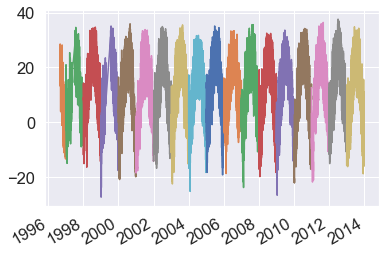

In [37]:
f, ax = plt.subplots(1, 1)
for y, df in weather_years.items():
    df.temp_air.plot(label=y)

In [ ]:
LATITUDE = header['latitude']
LONGITUDE = header['longitude']
ELEVATION = header['elevation']
TIMES = df.index

In [ ]:
# get solar position
sp = pvlib.solarposition.get_solarposition(
        TIMES, LATITUDE, LONGITUDE)
solar_zenith = sp.apparent_zenith.values
solar_azimuth = sp.azimuth.values
zenith = sp.zenith.values
ghi = df.ghi.values

In [ ]:
# check the calculated zenith from SURFRAD
ze_mbe = 100 * (
    sum(solar_zenith - df.solar_zenith.values)
    / sum(df.solar_zenith.values))
print(f'zenith MBE: {ze_mbe}%')

## Load SURFRAD daily weather data
Each day is in a separate file. We already read this in using pvlib

In [ ]:
# how many days are in this file
day_files = {int(d.parts[-1][5:-4]) for d in weather_years[10].iterdir()}
len(day_files)

In [ ]:
# missing days
missing_days = set(range(1, 366)) - day_files
missing_days

In [ ]:
df.index

## Sanity check
Look at a few timestamps around solar noon and display only a handful of columns:
* direct normal irradiance (DNI): `'dni'`
* global horizontal irradiance (GHI): `'ghi'`
* diffuse horizontal irradiance (DHI): `'dhi'`
* solar zenith: `'solar_zenith'`
* wind speed: `'wind_speed'`
* air temperature: `'temp_air'`

In [ ]:
# view a few timestamps to sanity check (E. Tufte, ...)
data_cols = ['dni', 'ghi', 'dhi', 'solar_zenith', 'wind_speed', 'temp_air']
df['2005-07-07T12:09:00-06:00':'2005-07-07T12:18:00-06:00'][data_cols]  # <-- XXX: pick dates for each month

In [ ]:
df[data_cols].plot(figsize=(16, 10))

In [ ]:
ax = irrad.dni.plot(figsize=(16, 10), label='Erbs')
ax = df.dni.plot(ax=ax, label='SURFRAD')
plt.legend()

In [ ]:
ax = irrad.dhi.plot(figsize=(16, 10), label='Erbs')
ax = df.dhi.plot(ax=ax, label='SURFRAD')
plt.legend()

## Data quality
Do some basic quality checking:
1. no irradiance should be negative
2. the DHI has to be the same as
    $$GHI - DNI \cos \left( \theta \right)$$

Then plot a sample day and take a look:

In [ ]:
surfrad_dni = np.maximum(0, df['dni'])
surfrad_ghi = np.maximum(0, df['ghi'])
surfrad_dif = np.maximum(0, df['dhi'])
surfrad_zerad = np.radians(df['solar_zenith'])
dhi_calc = pd.Series(np.maximum(0, surfrad_ghi - surfrad_dni*np.cos(surfrad_zerad)), name='DHI calc')
irr_check = pd.concat([surfrad_dni, surfrad_ghi, surfrad_dif, dhi_calc], axis=1)

In [ ]:
ax = irr_check['2005-07-01':'2005-07-04'].plot(figsize=(16, 10))  # <-- XXX: pick dates for each month
irrad['2005-07-01':'2005-07-04'][['dni', 'dhi']].plot(style=['--', ':'], ax=ax)
plt.legend()

In [ ]:
ax = irr_check['2005-11-01':'2005-11-04'].plot(figsize=(16, 10))  # <-- XXX: pick dates for each month
irrad['2005-11-01':'2005-11-04'][['dni', 'dhi']].plot(style=['--', ':'], ax=ax)
plt.legend()

## assembling weather file
To model the output we need the following columns:
1. datetime as ISO8601 but no nanoseconds or timezone
2. GHI
2. DHI (_AKA_: DIF)
3. Temp
4. WS

In [ ]:
# get other parameters needed for modeling like windspeed and air temp
surfrad_wspd = df['wind_speed']
surfrad_tair = df['temp_air']

In [ ]:
weather = pd.concat([surfrad_ghi, surfrad_dif, surfrad_tair, surfrad_wspd], axis=1)
weather.index.name = 'datetime'
weather.columns = ['GHI', 'DIF', 'Temp', 'WS']
weather.head()

In [ ]:
weather.loc['2005-01-01T08:21:00-06:00']  # <-- XXX: pick dates for each month

## Simulate 5-minute sampled satellite data
Choose instantaneous records every five minutes. Choose approximately the middle of the 5-minute sampling interval. Since these are 1-minute timestamps already, the closest to the middle is either the 2nd or 3rd minute.

In [ ]:
every5min = list(range(3, 60, 6))
every5min

### Shift index
We need the timestamp to be at the start of the sampling interval

In [ ]:
weather5inst = weather[weather.index.minute.isin(every5min)].shift(freq='-3min')
weather5inst60min = weather5inst.resample('H').mean()
weather5inst60min['2005-01-07T06:00:00-06:00':'2005-01-07T18:00:00-06:00']

## Ditto for every 15-minutes
Repeat for 15 minute intervals. Same dilemma, the closest record to the middle of the interval is either the 7th or 8th minute.

In [ ]:
every15min = list(range(6, 60, 15))
every15min

In [ ]:
weather15inst = weather[weather.index.minute.isin(every15min)].shift(freq='-6min')
weather15inst60min = weather15inst.resample('H').mean()
weather15inst60min['2005-01-07T06:00:00-06:00':'2005-01-07T18:00:00-06:00']

## Ditto 60-minutes

In [ ]:
weather30inst = weather[weather.index.minute.isin([15, 45])].shift(freq='-15min')
weather30inst60min = weather30inst.resample('H').mean()
weather30inst60min['2005-01-07T06:00:00-06:00':'2005-01-07T18:00:00-06:00']

# Visual Comparison of different sampling intervals
How do these look compared to each other? Are they shifted correctly? Are they on the same order? Do they capture the variability?

In [ ]:
ax = weather['2005-01-07T06:00:00-06:00':'2005-01-07T18:00:00-06:00']['GHI'].plot()
weather5inst['2005-01-07T06:00:00-06:00':'2005-01-07T18:00:00-06:00']['GHI'].shift(freq='3min').plot(ax=ax, marker='o', ms=5)
weather15inst['2005-01-07T06:00:00-06:00':'2005-01-07T18:00:00-06:00']['GHI'].shift(freq='6min').plot(ax=ax, marker='o', ms=10)
weather30inst['2005-01-07T06:00:00-06:00':'2005-01-07T18:00:00-06:00']['GHI'].shift(freq='15min').plot(ax=ax, marker='o', ms=15)
plt.legend(['1-inst', '5-inst', '15-inst', '30-inst'])

In [ ]:
ax = weather['2017-07-07 06:00':'2017-07-07 18:00']['GHI'].plot()
weather5inst['2017-07-07 06:00':'2017-07-07 18:00']['GHI'].shift(freq='2min').plot(ax=ax, marker='o', ms=5)
weather15inst['2017-07-07 06:00':'2017-07-07 18:00']['GHI'].shift(freq='7min').plot(ax=ax, marker='o', ms=10)
weather30inst['2017-07-07 06:00':'2017-07-07 18:00']['GHI'].shift(freq='15min').plot(ax=ax, marker='o', ms=15)
plt.legend(['1-inst', '5-inst', '15-inst', '30-inst'])
plt.title('Instantaneous measurements taken at various sampling rates')
plt.ylabel('GHI $[W/m^2]$')

## Hourly averages from instantaneously sampled

In [ ]:
ax = weather.resample('H').mean().shift(freq='30min')['2017-01-07 06:00':'2017-01-07 18:00']['GHI'].plot(marker='o')
weather5inst60min.shift(freq='30min')['2017-01-07 06:00':'2017-01-07 18:00']['GHI'].plot(ax=ax, marker='o')
weather15inst60min.shift(freq='30min')['2017-01-07 06:00':'2017-01-07 18:00']['GHI'].plot(ax=ax, marker='o')
weather30inst60min.shift(freq='30min')['2017-01-07 06:00':'2017-01-07 18:00']['GHI'].plot(ax=ax, marker='o')
plt.legend(['1-inst_60-min', '5-inst_60-min', '15-inst_60-min', '30-inst_60-min'])

In [ ]:
ax = weather.resample('H').mean().shift(freq='30min')['2017-07-07 06:00':'2017-07-07 18:00']['GHI'].plot(marker='o')
weather5inst60min.shift(freq='30min')['2017-07-07 06:00':'2017-07-07 18:00']['GHI'].plot(ax=ax, marker='o')
weather15inst60min.shift(freq='30min')['2017-07-07 06:00':'2017-07-07 18:00']['GHI'].plot(ax=ax, marker='o')
weather30inst60min.shift(freq='30min')['2017-07-07 06:00':'2017-07-07 18:00']['GHI'].plot(ax=ax, marker='o')
plt.legend(['1-inst_60-min', '5-inst_60-min', '15-inst_60-min', '30-inst_60-min'])
plt.title('Simulated satellite data averaged hourly from instantaneous measurements at various sampling rates')
plt.ylabel('GHI $[W/m^2]$')

In [ ]:
weather.resample('H').mean()['2017-01-07 06:00':'2017-01-07 18:00']

## Compare 15-minute time averaged to 15-minute instantaneous
How do shorter sampling intervals compare to time averaged values? Starting with 1-minute data, average every 15-minutes and compare to picking a single instantaneous record every 15 minutes, starting at the 7th minute.

In [ ]:
ax = weather.resample('15T').mean().shift(freq='450s')['2017-01-07 06:00':'2017-01-07 18:00']['GHI'].plot(marker='o')
weather15inst['2017-01-07 06:00':'2017-01-07 18:00']['GHI'].shift(freq='7min').plot(ax=ax, marker='o')
plt.legend(['1-inst_15-min', '15-inst'])

In [ ]:
ax = weather.resample('15T').mean().shift(freq='450s')['2017-07-07 06:00':'2017-07-07 18:00']['GHI'].plot(marker='o')
weather15inst['2017-07-07 06:00':'2017-07-07 18:00']['GHI'].shift(freq='7min').plot(ax=ax, marker='o')
plt.legend(['1-inst_15-min', '15-inst'])

In [ ]:
weather.resample('15T').mean()['2017-01-07 10:30':'2017-01-07 13:30']

# save output
Save the files we need to run SolarFarmer

In [ ]:
month = 'allmonths'
output_dir = pathlib.Path(f'instantaneous_{month}')
output_dir.mkdir(exist_ok=False)  # <-- January is already done

In [ ]:
weather5inst.dropna().to_csv(output_dir / f'NIST_{month}-2017_5-inst.tab', sep='\t')
weather5inst60min.dropna().to_csv(output_dir / f'NIST_{month}-2017_5-inst_60-min.tab', sep='\t')

In [ ]:
weather15inst.dropna().to_csv(output_dir / f'NIST_{month}-2017_15-inst.tab', sep='\t')
weather15inst60min.dropna().to_csv(output_dir / f'NIST_{month}-2017_15-inst_60-min.tab', sep='\t')

In [ ]:
weather30inst.dropna().to_csv(output_dir / f'NIST_{month}-2017_30-inst.tab', sep='\t')
weather30inst60min.dropna().to_csv(output_dir / f'NIST_{month}-2017_30-inst_60-min.tab', sep='\t')

In [ ]:
weather60inst = weather[weather.index.minute.isin([30])].shift(freq='-30min')
weather60inst['2017-01-07 06:00':'2017-01-07 18:00']

In [ ]:
weather60inst.dropna().to_csv(output_dir / f'NIST_{month}-2017_60-inst.tab', sep='\t')

# Time Averaged
This is the original clipping error problem.

In [ ]:
weather.dropna().to_csv(output_dir / f'NIST_{month}-2017_1-min.tab', sep='\t')
weather.resample('5T').mean().dropna().to_csv(output_dir / f'NIST_{month}-2017_5-min.tab', sep='\t')
weather.resample('15T').mean().dropna().to_csv(output_dir / f'NIST_{month}-2017_15-min.tab', sep='\t')
weather.dropna().resample('30T').mean().dropna().to_csv(output_dir / f'NIST_{month}-2017_30-min.tab', sep='\t')
weather.resample('H').mean().dropna().to_csv(output_dir / f'NIST_{month}-2017_60-min.tab', sep='\t')